# N0 configuration Wavelength Study


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton

importing NGSolve-6.2.2203-56-g47f483033


# Initialize

In [27]:
n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)
betas1 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

In [45]:
alpha=5
n_air = 1.00027717
n_glass = 1.4388164768221814

d = 4.0775e-05
ts = [d, .5*d]
ns = [lambda x: n_air, lambda x: n_glass]
mats = ['air', 'glass']
maxhs = [.060, .010]
scale = 15e-6


In [46]:
A = BraggExact(ts=ts, maxhs=maxhs, ns=ns, mats=mats, scale=scale)


In [47]:
Draw(CF(list(A.ns)),A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

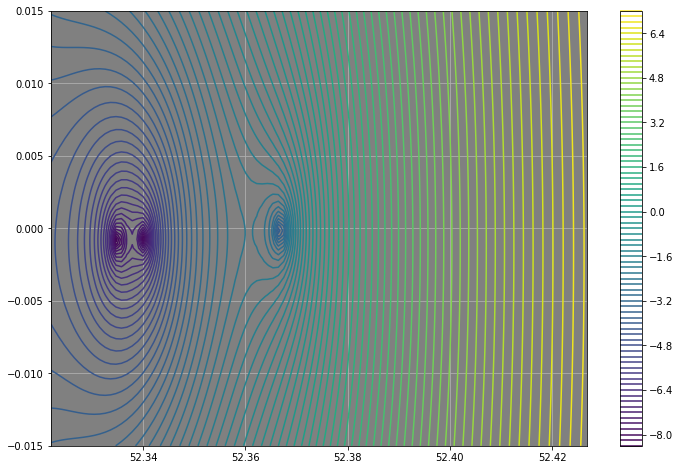

In [38]:
k_low = A.ks[0].real * A.scale
plotlogf(A.determinant, .999*k_low, 1.001 * k_low, -.015,.015, nu, outer,
         iref=100, rref=100, levels=100)

In [39]:
guess = np.array(.99998*k_low)
imag = 0
x0 = np.array(guess + imag*1j)

beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
beta

(52.36692075233395-0.00015576360314173543j)

In [40]:
Fs = A.all_fields(beta, nu, outer)

In [48]:
Draw(Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

# Wavelength Loss Study


In [50]:

for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, maxhs=[2,2], wl=wls[i], ns=ns, mats=mats, scale=scale, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(.99999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Scaled beta:  (67.33269141518102-9.422996804515624e-05j) . Residual of determinant:  8.018424657867217e-13 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Scaled beta:  (67.23662248786066-9.449937741749327e-05j) . Residual of determinant:  5.345070836101618e-13 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Scaled beta:  (67.14082723756141-9.476917132029115e-05j) . Residual of determinant:  4.854636289879224e-14 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Scaled beta:  (67.04530449638712-9.503934975326443e-05j) . Residual of determinant:  6.592903412427898e-13 


     --------------------  5/301: wavelength: 1.408e-06  --------------------     

Scaled beta:  (66.95005310307742-9.530991271613819e-05j) . Residual of determinant:  1.1624534497169988e-14 


     -------------

Scaled beta:  (63.52072963896662-0.00010587623913785886j) . Residual of determinant:  3.8611694575317106e-13 


     --------------------  44/301: wavelength: 1.4859999999999998e-06  --------------------     

Scaled beta:  (63.43522081953923-0.00010616179854290937j) . Residual of determinant:  1.4503788726688125e-13 


     --------------------  45/301: wavelength: 1.488e-06  --------------------     

Scaled beta:  (63.34994184023984-0.00010644774246626821j) . Residual of determinant:  2.693064410645204e-13 


     --------------------  46/301: wavelength: 1.49e-06  --------------------     

Scaled beta:  (63.26489177553783-0.0001067340709076357j) . Residual of determinant:  2.425225181341017e-13 


     --------------------  47/301: wavelength: 1.4919999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (63.18006970486518-0.00010702078386665961j) . Residual of determinant:  1.8973610015579423e-13 


     --------------------  48/301: wavelength: 1.494e-06  ---

Scaled beta:  (60.34812868057073-0.00011729798124274516j) . Residual of determinant:  6.943997490013843e-13 


     --------------------  83/301: wavelength: 1.564e-06  --------------------     

scaling guess: 1
Scaled beta:  (60.2709405749485-0.00011759853663714025j) . Residual of determinant:  3.2317951761489866e-14 


     --------------------  84/301: wavelength: 1.566e-06  --------------------     

Scaled beta:  (60.19394960806164-0.0001178994765379187j) . Residual of determinant:  7.76032633574721e-14 


     --------------------  85/301: wavelength: 1.5679999999999999e-06  --------------------     

Scaled beta:  (60.11715502555279-0.00011820080094476849j) . Residual of determinant:  3.633029698674889e-14 


     --------------------  86/301: wavelength: 1.57e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (60.04055607690848-0.00011850250985733784j) . Residual of determinant:  1.5574015988957287e-13 


     --------------------  87/301: waveleng

scaling guess: 2
Scaled beta:  (57.267715051116745-0.00013025236414495578j) . Residual of determinant:  7.28337473486123e-14 


     --------------------  125/301: wavelength: 1.648e-06  --------------------     

Scaled beta:  (57.198198811627464-0.0001305690685319372j) . Residual of determinant:  1.3344167382409495e-13 


     --------------------  126/301: wavelength: 1.6499999999999999e-06  --------------------     

Scaled beta:  (57.12885107625932-0.00013088615741174527j) . Residual of determinant:  2.032361184273908e-13 


     --------------------  127/301: wavelength: 1.652e-06  --------------------     

Scaled beta:  (57.05967123301198-0.00013120363078405006j) . Residual of determinant:  6.308125247104513e-14 


     --------------------  128/301: wavelength: 1.654e-06  --------------------     

scaling guess: 1
Scaled beta:  (56.99065867284514-0.00013152148864851906j) . Residual of determinant:  6.494855942244123e-14 


     --------------------  129/301: wavelength: 1.656

scaling guess: 2
Scaled beta:  (54.54948561932455-0.00014355252455303816j) . Residual of determinant:  1.755894288443238e-13 


     --------------------  166/301: wavelength: 1.73e-06  --------------------     

Scaled beta:  (54.4864060452228-0.00014388499286964638j) . Residual of determinant:  9.96013288958422e-14 


     --------------------  167/301: wavelength: 1.7319999999999999e-06  --------------------     

Scaled beta:  (54.423472132289284-0.0001442178456651691j) . Residual of determinant:  6.960221016375149e-13 


     --------------------  168/301: wavelength: 1.7339999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (54.36068337650614-0.00014455108293919485j) . Residual of determinant:  3.8841447181873613e-13 


     --------------------  169/301: wavelength: 1.736e-06  --------------------     

Scaled beta:  (54.29803927617827-0.00014488470469144806j) . Residual of determinant:  2.4870259375434373e-13 


     --------------------  170/301: wavele

Scaled beta:  (52.13514248548671-0.00015715114727397902j) . Residual of determinant:  1.6316824801606314e-13 


     --------------------  206/301: wavelength: 1.8099999999999998e-06  --------------------     

Scaled beta:  (52.07751800871776-0.00015749899447037655j) . Residual of determinant:  3.795496497971535e-14 


     --------------------  207/301: wavelength: 1.8119999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (52.02002072000574-0.00015784722613143524j) . Residual of determinant:  6.595917160084031e-14 


     --------------------  208/301: wavelength: 1.814e-06  --------------------     

Scaled beta:  (51.96265019866252-0.00015819584225677702j) . Residual of determinant:  7.447499862699896e-14 


     --------------------  209/301: wavelength: 1.8159999999999999e-06  --------------------     

Scaled beta:  (51.905406025853296-0.00015854484284602845j) . Residual of determinant:  1.8709187044186007e-13 


     --------------------  210/301: wavele

Scaled beta:  (49.76716837889234-0.000172455743723341j) . Residual of determinant:  1.7956696786759468e-13 


     --------------------  249/301: wavelength: 1.8959999999999997e-06  --------------------     

Scaled beta:  (49.7146547818563-0.00017282012256394222j) . Residual of determinant:  1.1709920635273367e-13 


     --------------------  250/301: wavelength: 1.8979999999999999e-06  --------------------     

Scaled beta:  (49.66225183879597-0.00017318488585309005j) . Residual of determinant:  1.417350380760621e-13 


     --------------------  251/301: wavelength: 1.9e-06  --------------------     

Scaled beta:  (49.609959200277856-0.00017355003359041812j) . Residual of determinant:  1.470898198525388e-13 


     --------------------  252/301: wavelength: 1.9019999999999997e-06  --------------------     

Scaled beta:  (49.55777651833818-0.00017391556577552644j) . Residual of determinant:  6.508933690734948e-13 


     --------------------  253/301: wavelength: 1.904e-06  -----

<IPython.core.display.Javascript object>


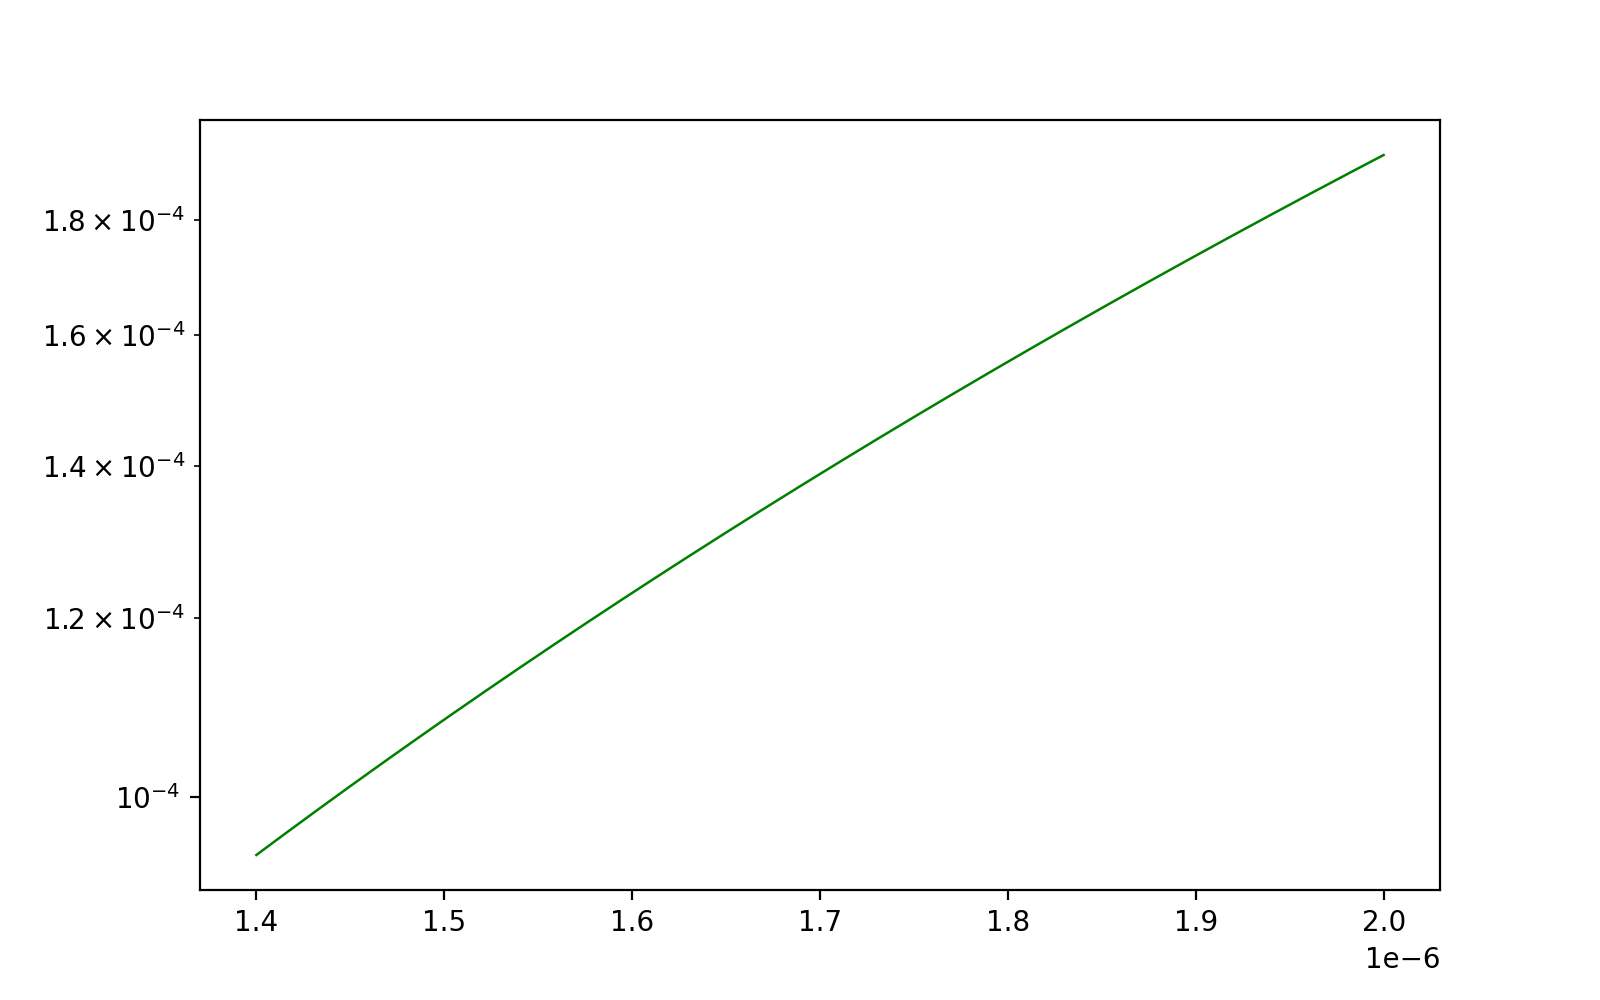

In [51]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9)
plt.yscale('log')


In [52]:
np.save('../N2_varying_thickness_studies/data/N0_betas', betas1)